In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import math
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
import warnings
import random
warnings.filterwarnings('ignore')

In [18]:
def resizeImage(img, size=(32,32)):
    '''
    Resize the input image into the given input shape
    '''
    img = Image.fromarray(img)
    new_width  = size[1]
    new_height = size[0]
    img = img.resize((new_width, new_height), Image.ANTIALIAS)
    img = np.array(img)
    return img

### Activation Functions:

In [19]:
def relu(x):
    '''
    Activation function - Rectified Linear Unit
    '''
    return np.maximum(x, 0)

def sigmoid(x):
    '''
    Activation function - Sigmoid
    '''
    y = 1/(1+np.exp(-x))
    return y

def softmax(x):
    '''
    Activation function - softmax 
    '''
    y = np.exp(x)
    res = y / np.sum(y, axis=1, keepdims=True)
    return np.nan_to_num(res)

def stable_softmax(x):
    z = x - max(x)
    numerator = np.exp(z)
    denominator = np.sum(numerator)
    softmax = numerator/denominator
    return softmax

### Code for Convolution

In [20]:
def applyConvolution(img, filter_arr):
    '''
    Apply a single convolution using the input filter_arr 
    '''
    img = img.copy()
    res = []
    window_i = filter_arr.shape[0]
    window_j = filter_arr.shape[1]
    for i in range(img.shape[0]-filter_arr.shape[0]+1):
        res_i = []
        for j in range(img.shape[1]-filter_arr.shape[1]+1):
            conv_res = np.multiply(img[i: i+window_i, j: j+ window_j, :], filter_arr)
            conv_res = np.sum(conv_res)
            res_i.append(conv_res)
        res.append(res_i)
    res = np.array(res)
    res = res.reshape(res.shape[0],res.shape[1],-1)
    return res

In [32]:
def convolute(image, no_filters, size):
    '''
    Apply 'no_filters' no.of convolutions of size = 'size'  
    '''
    result = None
    for i in range(no_filters):
#         conv_filter = np.random.randint(-2, 2, size=(size[0], size[1], image.shape[2]))
#         conv_filter_vals = np.random.randn(size[0], size[1])
        conv_filter_vals = np.random.randn(size[0], size[1], image.shape[2])
        conv_filter = conv_filter_vals/np.sum(conv_filter_vals)
#         conv_filter = np.repeat(conv_filter_vals[:, :, np.newaxis], image.shape[2], axis=2)
        conv_res = applyConvolution(image, conv_filter)
        if(result is None):
            result = conv_res
        else:
            result = np.concatenate((result,conv_res),axis=2)
    return np.array(result)

### Code for Max Pooling

In [39]:
def applyMaxPool(img, pool, stride=2):
    '''
    Apply max pool of size = 'pool' and stride = 'stride'
    '''
    img = img.copy()
    res = []
    window_i = pool[0]
    window_j = pool[1]
#     (n_H, n_W, n_C) = img.shape
#     Z = np.zeros((n_H, n_W, n_C))
    for i in range(0,img.shape[0],stride):
        res_i = []
        for j in range(0,img.shape[1],stride):
            max_pool_res = []
            for k in range(img.shape[2]):
                max_pool_single = np.max(img[i: i+window_i, j: j+ window_j, k])
                max_pool_res.append(max_pool_single)
#                 Z[i,j,k] = max_pool_single
            res_i.append(max_pool_res)
        res.append(res_i)
    return np.array(res)

### Code for Fully Connected Layers

In [23]:
def fullyConnectedPass(X, output_nodes, activation=sigmoid):
    '''
    Do a single pass of fully connected layer, weights initialized randomly
    '''
    weights = np.random.randn(X.shape[1],output_nodes)*np.sqrt(2/X.shape[1])
    res = np.dot(X,weights)
    res = activation(res)
    return res

In [24]:
def convertToFC(img):
    '''
    Convert the input to a fully connected layer
    '''
    img = img.flatten()
    img = img.reshape(1,len(img))
    return img

In [25]:
def showImages(img):
    '''
    Print the different layers of the image
    '''
    f,ax = plt.subplots(1,img.shape[2],figsize=(20,20))
    for i in range(img.shape[2]):
        ax[i].imshow(img[:,:,i])
    plt.show()

In [26]:
def normalizeImg(img):
    '''
    Normalize Image
    '''
    img = img/255.0
    return img

### Code for CNN forward Pass

In [45]:
def forwardPass(img, hidden_act=sigmoid):
    '''
    Function to do one full pass of the entire architecture given below
    '''
    print("Input")
    plt.imshow(img)
    plt.show()
    img = img.copy()
    img = normalizeImg(img)
    img = convolute(img, no_filters=6, size=(5,5))
    print("After convolution")
    print(img.shape)
    showImages(img)
    img = applyMaxPool(img, pool=(2,2),stride=2)
    print("After max pool")
    print(img.shape)
    showImages(img)
    img = convolute(img, no_filters=16, size=(5,5))
    print("After convolution")
    print(img.shape)
    showImages(img)
    img = applyMaxPool(img, pool=(2,2),stride=2)
    print("After max pool")
    print(img.shape)
    showImages(img)
    img = convolute(img, no_filters=120, size=(5,5))
#     img = convertToFC(img)
    print("After convolution")
    print(img.shape)
#     showImages(img)
    img = convertToFC(img)
    img = fullyConnectedPass(img,output_nodes=120, activation=hidden_act)
    print("Fully Connected")
    print(img.shape)
    img = fullyConnectedPass(img,output_nodes=84, activation=hidden_act)
    print("Fully Connected")
    print(img.shape)
    img = fullyConnectedPass(img,output_nodes=10,activation=softmax)
    print("Final Layer")
    print(img.shape)
    return img

# Question 1: Forward pass of a CNN as shown below:
![title](CNNarchitecture.png)

### Test Image

In [28]:
input_img = plt.imread("./sample2.jpeg")
input_img = resizeImage(input_img, size=(32,32))

### Forward pass with hidden activation: Sigmoid

Input


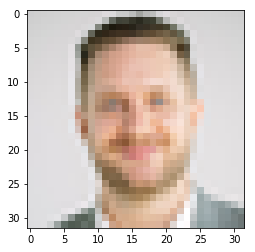

After convolution
(28, 28, 6)


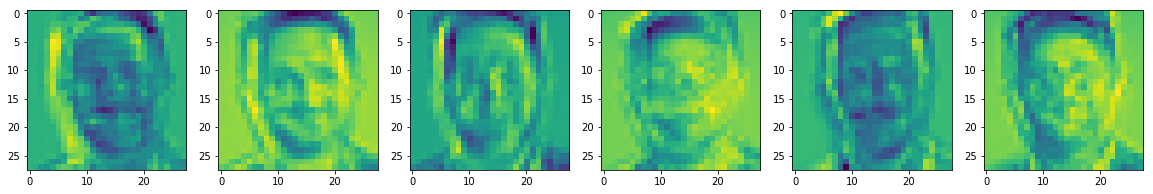

After max pool
(14, 14, 6)


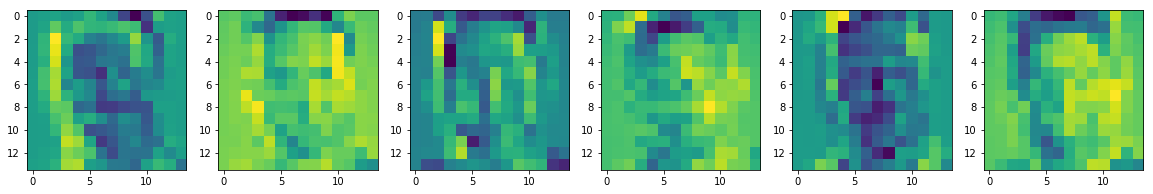

After convolution
(10, 10, 16)


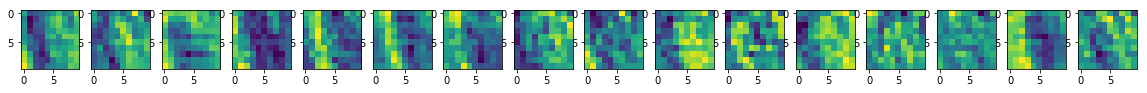

After max pool
(5, 5, 16)


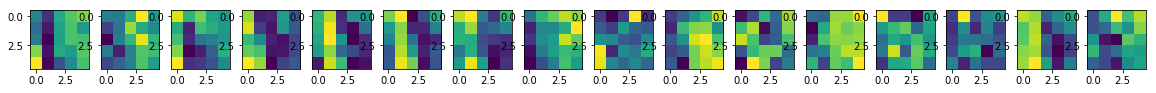

After convolution
(1, 1, 120)
Fully Connected
(1, 120)
Fully Connected
(1, 84)
Final Layer
(1, 10)


In [46]:
res_sigmoid = forwardPass(input_img, sigmoid)

In [47]:
print("Final layer of CNN with hidden act as sigmoid:")
print(res_sigmoid)

Final layer of CNN with hidden act as sigmoid:
[[0.09069756 0.03536535 0.08129869 0.02594913 0.18539723 0.05169404
  0.22985153 0.15560122 0.00689811 0.13724715]]


### Forward pass with hidden activation: Relu

Input


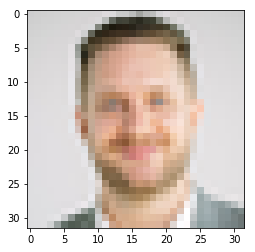

After convolution
(28, 28, 6)


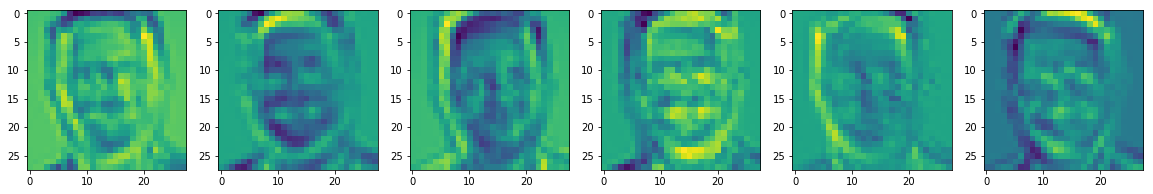

After max pool
(14, 14, 6)


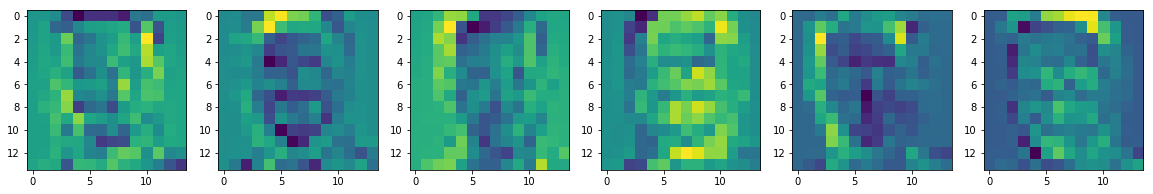

After convolution
(10, 10, 16)


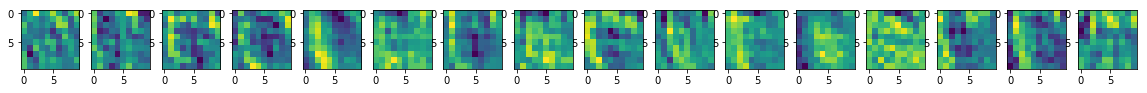

After max pool
(5, 5, 16)


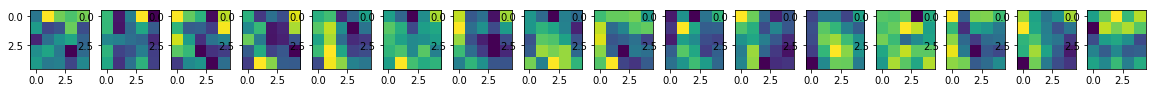

After convolution
(1, 1, 120)
Fully Connected
(1, 120)
Fully Connected
(1, 84)
Final Layer
(1, 10)


In [48]:
res_relu = forwardPass(input_img, relu)

In [49]:
print("Final layer of CNN with hidden act as relu:")
print(res_relu)

Final layer of CNN with hidden act as relu:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Question 2:
1. What are the number of parameters in 1st convolutional layers?
    * ((5x5)x3 + 1)x6 = 456
2. What are the number of parameters in pooling operation?
    * 0
3. Which of the following operations contain most number of parameters? (a) conv (b) pool (c) Fully connected layer (FC) (d) Activation Functions
    * Fully connected layer (FC)
4. Which operation consume most amount of memory? (a) initial convolution layers (b) fully connected layers at the end
    * Fully Connected
5. Try different activation functions and describe observations.
    * With RELU, the numbers overflow if the weights are initialized randomly, hence I had to use Kaiming He initializion
    * As there was no learning, and the initialization was random, there was no notable difference as both of them are trying to find relevant feature patterns(also, not backprop, hence cannot comment on the performance)